# Boston House Price Predictions

## Introduction
Boston is very close to my heart. I absolutely love the place! I did my Master's in that city and interned as a data scientist. I came across housing dataset and got very excited and started to play around with it.
Since Boston is known for expensive real estate, I wanted to see if I could predict the housing prices given a few set of parameters.

## Data
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 


1.	CRIM: per capita crime rate by town
2.  ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3.	INDUS: proportion of non-retail business acres per town
4.	CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5.	NOX: nitric oxides concentration (parts per 10 million)
6.	RM: average number of rooms per dwelling
7.	AGE: proportion of owner-occupied units built prior to 1940
8.	DIS: weighted distances to ﬁve Boston employment centers
9.	RAD: index of accessibility to radial highways
10.	TAX: full-value property-tax rate per $10,000
11.	PTRATIO: pupil-teacher ratio by town

12.	MEDV: Median value of owner-occupied homes in $1000s

13. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
14. LSTAT: % lower status of the population



## Table of Contents

* [1. Importing Libraries](#Importing_Libraries)

* [2. Data Analysis and EDA](#Data_Analysis_and_EDA)

    * [2.1 Handling Missing Values](#Handling_Missing_Values)
    
    * [2.2 Correlation](#Correlation)
    
    * [2.3 Univariate Analysis](#Univariate_Analysis)
    
        * [2.3.1 Box Plots](#Box_Plots)
        
        * [2.3.2 Distribution Plots](#Distribution_Plots)
        
    * [2.4 Multivariate Analysis](#Multivariate_Analysis)
    
    * [2.5 Normalize Skewed Data](#Normalize_Skewed_Data)
    
* [3. Building a Baseline Model](#Baseline_Model)
    
    * [3.1 Variable Analysis and Feature Importance](#Variable_Analysis_and_Feature_Importance)
    
    
* [4. Building and Cross Validating Models](#Building_and_Cross_Validating_Models)

    * [4.1 Model 1: Random Forest Regression](#Random_Forest_Regressor)
    
    * [4.2 Model 2: Linear Regression](#Linear_Regression)
    
    * [4.3 Model 3: XGBoost Regression](#XGBoost_Regression)
    
* [5. Best Model and Hyperparameter Tuning](#Best_Model_and_Hyperparameter_tuning)

* [6. Final Model!](#Final_Model)

* [7. Test Data](#Test_Data)

    * [7.1 Importing and Handling Missing Values](#Importing_and_Handling_Missing_Values)
    
    * [7.2 Predicting the target variable](#Predicting_Target_Variable)

* [8. Saving model weights to pickel file](#Saving_Model_Weights)

* [9. Conclusion](#Conclusion)

* [10. Model Deployement](#Model_Deployement)

* [11. References](#References)

## 1. Importing Libraries <a class="anchor" id="Importing_Libraries"></a>

In section 1, I will be importing all teh necessary libraries I might need for my analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
import xgboost as xgb
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas.util.testing as tm
import warnings
warnings.filterwarnings('ignore')

/Users/manognamantripragada/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Data Analysis and EDA <a class="anchor" id="Data_Analysis_and_EDA"></a>

In this section, I aim at **preprocessing** the data, handling **missing values**, understand the **correaltion between features and the target variable** and the features amonst themselves in order to understand their importance and if there is **multicollinearity** and finally handle the **skewness in the data**.

In [3]:
#Importing the data and checking the top 10 rows of the training data frame
train_df = pd.read_csv('HousingData_train.csv')
train_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
#The describe function is used: 
train_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,447.000000,448.000000,448.000000,449.000000,467.000000,467.000000,448.000000,467.000000,467.000000,467.000000,467.000000,467.000000,449.000000,467.000000
mean,3.421270,10.930804,11.169196,0.069042,0.553545,6.292741,68.152232,3.762997,9.468951,405.644540,18.341113,354.537687,12.601938,22.768308
std,7.935927,22.789075,6.921654,0.253809,0.115172,0.714266,27.892359,2.002119,8.671929,169.161749,2.177228,94.204705,7.219214,9.304239
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079960,0.000000,5.175000,0.000000,0.449000,5.888500,45.325000,2.087550,4.000000,277.000000,16.900000,374.495000,6.920000,17.100000
50%,0.249800,0.000000,9.900000,0.000000,0.532000,6.216000,76.500000,3.272100,5.000000,329.000000,18.700000,391.230000,11.100000,21.500000
75%,3.397665,12.500000,18.100000,0.000000,0.624000,6.630500,93.650000,5.164950,24.000000,666.000000,20.200000,396.220000,16.650000,25.750000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


### 2.1 Handling Missing Values <a class="anchor" id="Handling_Missing_Values"></a>


In [4]:
#Checking for nulls
#printing out the nulls in the dataframe
train_df.isnull().sum(axis=0)

CRIM       20
ZN         19
INDUS      19
CHAS       18
NOX         0
RM          0
AGE        19
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      18
MEDV        0
dtype: int64

In [5]:
nullcols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

train_df['CRIM'].fillna(train_df['CRIM'].mean(), inplace = True)
train_df['ZN'].fillna(train_df['ZN'].mean(), inplace = True)
train_df['INDUS'].fillna(train_df['INDUS'].mean(), inplace = True)
train_df['CHAS'].fillna(method='ffill', inplace = True)
train_df['AGE'].fillna(train_df['AGE'].mean(), inplace = True)
train_df['LSTAT'].fillna(train_df['LSTAT'].mean(), inplace = True)

train_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 2.2 Correlation <a class="anchor" id="Correlation"></a>


In this section, I will be focusing on understanding the correlation between different features and the target variable and also if there exists any multi-collinearity effect.

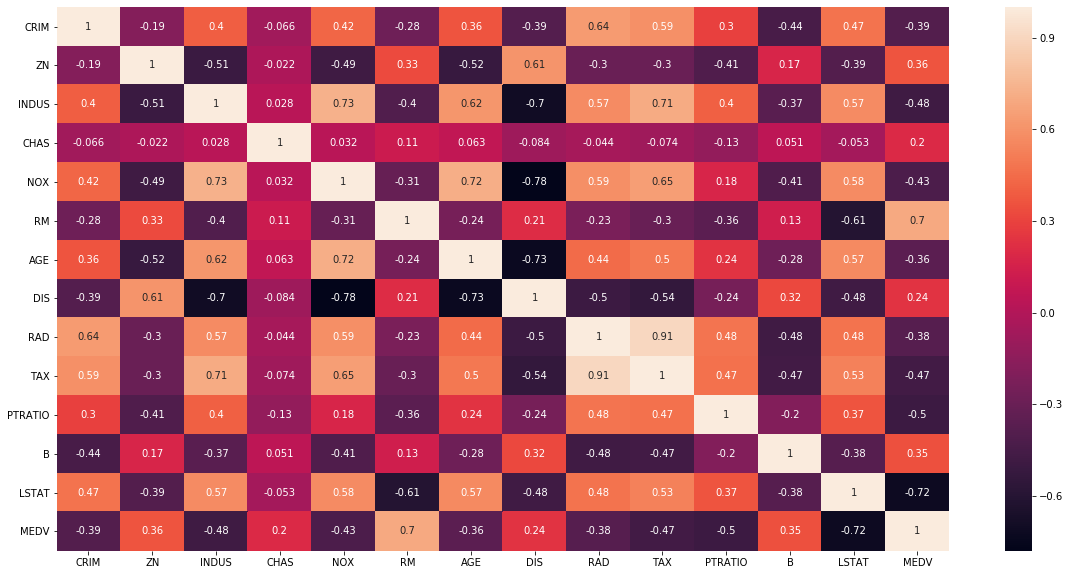

In [6]:
#Plotting the correlation

plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(method='pearson'), annot=True)

A correlation coefficients range from -1 to 1 where 1 refers to having a strong positive correlaton and -1 refers to having a strong negative correlation.

For building a model to be able to predict the prices accurately, we need to use the features which are highly correlated to the target variable.

1. RM has a strong positive correlation(0.70) with the target variable and LSTAT has a strong negative correlation(-0.72).
2. We can notice that RAD and TAX and highly correlated (0.91) and also that INDUS, NOX and AGE have a strong negative correlation with DIS ( i.e -0.7, -0.78 and -0.73 respectively) and many more.

Since it is very difficult to find the actual impact of multicolliearity by directly looking at the dataframe, I will be using a Feature importance matrix and VIF(Variance Inflation Factor) to measure this.




### 2.3 Univariate Analysis <a class="anchor" id="Univariate_Analysis"></a>



#### 2.3.1 Box Plots <a class="anchor" id="Box_Plots"></a>
I am using box plots for understanding the distribution and outliers in my data

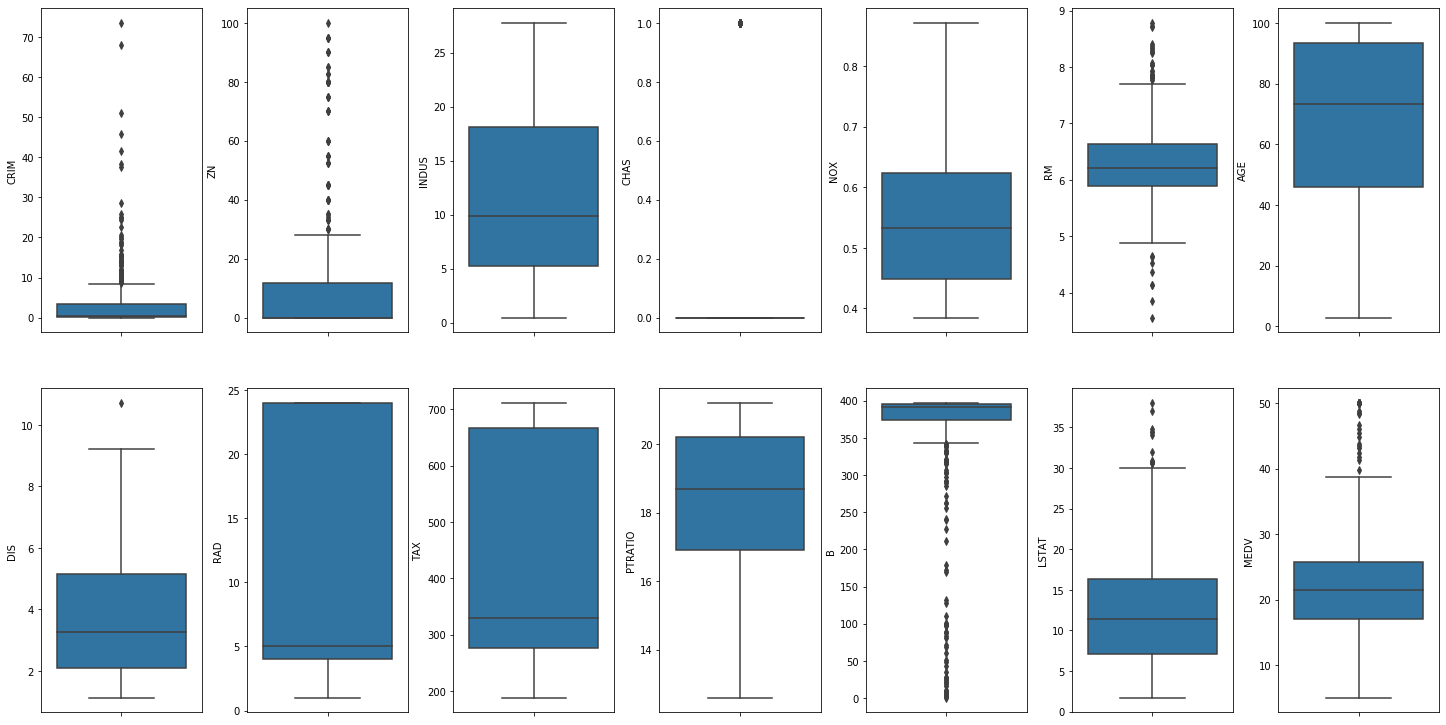

In [7]:
#Plotting the distributions to visually inspect the spread or each feature and the outliers in each column

#Box plot fpr understanding their spread and outliers
#train_df = train_df.drop(["PTRATIO", "NOX", "RM", "TAX", "B"], axis=1)
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in train_df.items():
    sns.boxplot(y=k, data=train_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### 2.3.2 Distribution Plots <a class="anchor" id="Distribution_Plots"></a>

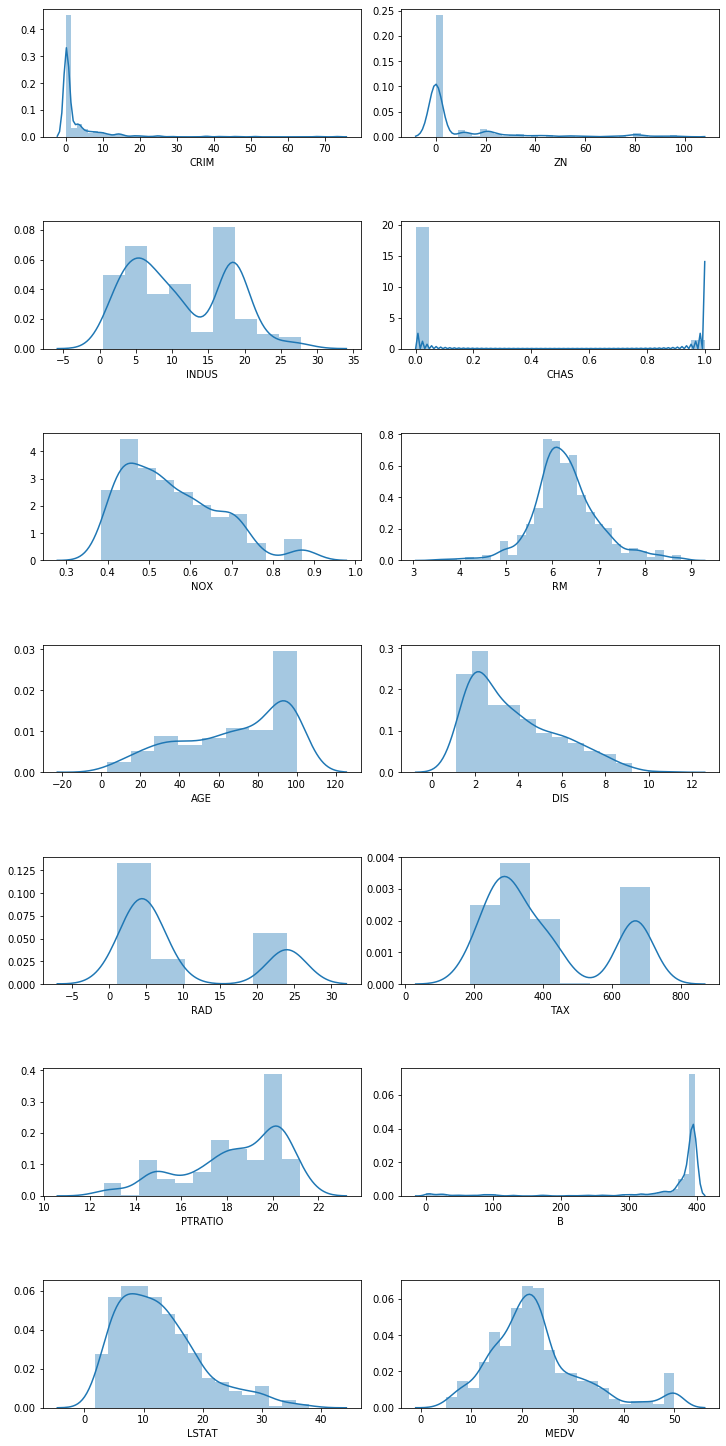

In [8]:
#Distplot for looking at the distribution (univariate distribution)

fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(10, 20))
index = 0
axs = axs.flatten()
for k,v in train_df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### 2.4 Multivariate Analysis <a class="anchor" id="Multivariate_Analysis"></a>

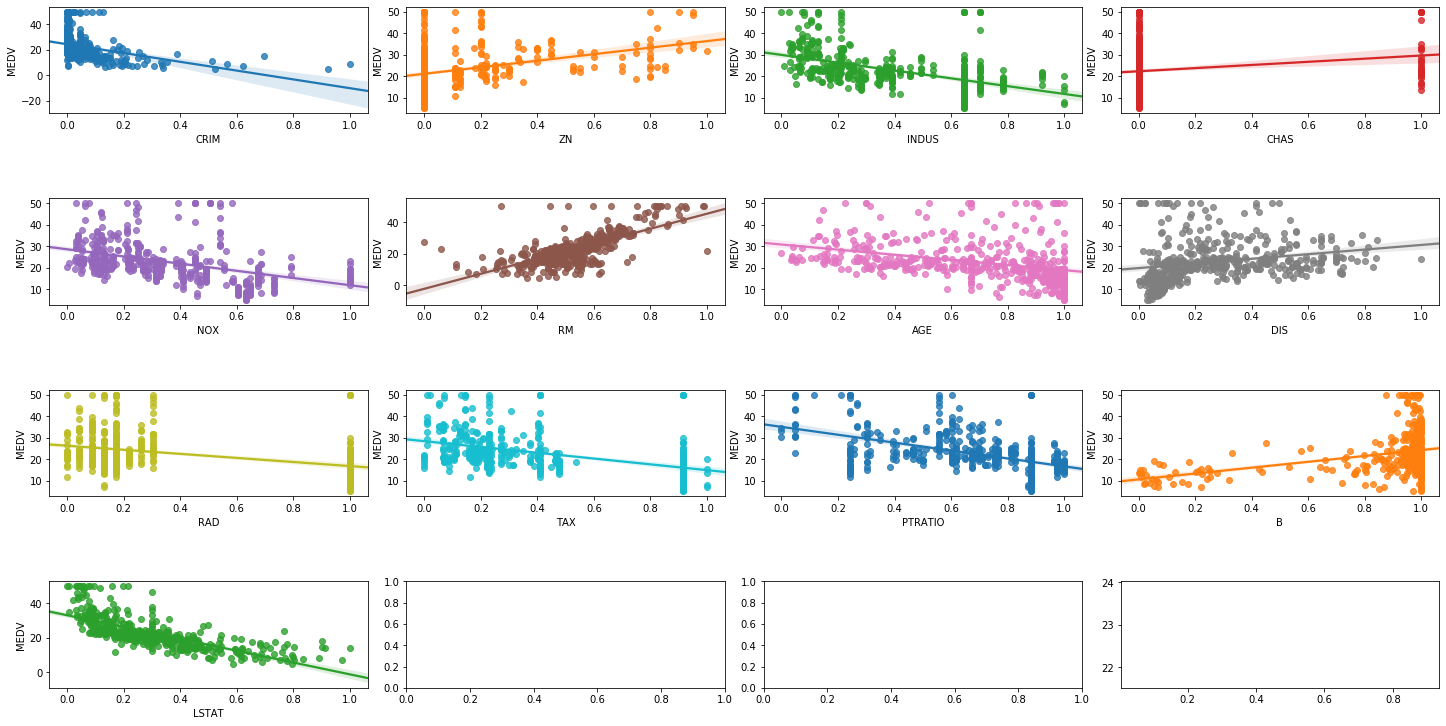

In [9]:
#Picking columns which have a correlation above 0.3

# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()

column_sels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
X = train_df.drop(['MEDV'], axis=1)
y = train_df['MEDV'] 
#x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
x = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### 2.5 Normalize Skewed Data <a class="anchor" id="Normalize_Skewed_Data"></a>
We already saw in the above distribution plots, there is a lot of skewness in the data. Since models do not perform wel with skewed data, let us handle it by taking the log

In [10]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

### 3. Building a Baseline Model <a class="anchor" id="Baseline_model"></a>
Let us build a baseline model before starting any preprocessing to have a benchmark score and error value. I am using a simple Random forest regression model to start as my baseline model since it is know to be robust with outliers and we can see that out data has a lot of outliers.

In [11]:
#Splitting train and test data
#X = train_df.drop(['MEDV'], axis=1)
X = x
#y = train_df['MEDV']
y = y

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=5)

#random forest

model = RandomForestRegressor(n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)

#Evaluating
y_train_pred = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("\nThe model performance on training data")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
            

# model evaluation for validation set
y_val_pred = model.predict(X_val)
rmse = (np.sqrt(mean_squared_error(y_val, y_val_pred)))
r2 = r2_score(y_val, y_val_pred)

print("\nThe model performance on validation data")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))



The model performance on training data
--------------------------------------
RMSE is 0.06800748080639929
R2 score is 0.9691446437407878

The model performance on validation data
--------------------------------------
RMSE is 0.14269894943082048
R2 score is 0.8747882702236336


In [12]:
num_folds = 10
seed = 7

folds = KFold(n_splits = num_folds, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds, verbose=0)
r2= '{:.2f}'.format(scores.mean()*100)
print("\nScores for all 10 folds:\n", scores)
print('\nAverage R2 score: ', scores.mean())
print('\nThe model explains {}% of the variability of the response data around its mean'.format(r2))


Scores for all 10 folds:
 [0.85160132 0.66786502 0.81272558 0.82093168 0.82951653 0.86170083
 0.77633739 0.835064   0.60162666 0.81035802]

Average R2 score:  0.786772703203754

The model explains 78.68% of the variability of the response data around its mean


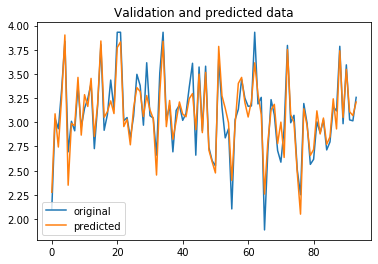

In [13]:
x_ax = range(len(y_val))
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, y_val_pred, label="predicted")
plt.title("Validation and predicted data")
plt.legend()
plt.show()

The baseline model perform very well and gives an R2 value of 87% on unseen data. But looking at the MSE, we can notice that it is almost twice the training error, thus there is a change of overfitting. 
Looking at this model, let us try to understand how the features play a role and if the correlation between these features if having an affect on the model.

## Variable Analysis and Feature Importance <a class="anchor" id="Variable_Analysis_and_Feature_Importance"></a>


In [14]:
def feat_importance(model,train_df):
    importance = model.feature_importances_
    importance = pd.DataFrame(importance,index=x.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)
importance = feat_importance(model,train_df)
importance[:]

,Importance
LSTAT,0.532306
RM,0.213882
CRIM,0.088676
NOX,0.052020
DIS,0.040704
AGE,0.019285
TAX,0.016593
B,0.014853
PTRATIO,0.010032
INDUS,0.006626


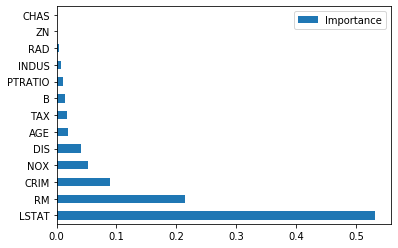

In [15]:
importance.plot(kind='barh')

Looking at this feature importance matrix, we can onserve that RM and LSTAT are the two major contributing features and it re-iterates what we had established from the correlation matrix above.

It is very important to be able to eliminate non important features in order to improve the performance of the model. 

In [16]:
#Discarding features with feature coefficients less than 0.01

features = importance[importance['Importance'] > 0.01].index
train_df1 = train_df[features].copy()


#Splitting data into training and validation set
X = train_df1
y = train_df["MEDV"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=5)
#Splitting data into traina nd validation

X = train_df1

# Fitting our Random Forest Model after discarding the less important features.

In [17]:
#Calculating Multicollinearity using VIF
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,10.4,LSTAT
1,68.3,RM
2,2.0,CRIM
3,64.1,NOX
4,10.8,DIS
5,19.6,AGE
6,18.0,TAX
7,19.1,B
8,69.0,PTRATIO


In [18]:

randforest_model = RandomForestRegressor(n_jobs=-1, oob_score=True)
randforest_model.fit(X_train, y_train)
y_val_pred = randforest_model.predict(X_val)
rmse = (np.sqrt(mean_squared_error(y_val, y_val_pred)))
r2 = r2_score(y_val, y_val_pred)
print('RMSE score is: {} and R2 is {}'.format(rmse, r2))

RMSE score is: 3.5808695306789224 and R2 is 0.8689115021457012


It appears that the performance slightly reduced. So instead of picking the features, lets us try looking at the VIF factors for multicollinearity and then try dropping each feature and checking the impact it has on the model.

In [19]:
#Calculating Multicollinearity
# For each X, calculate VIF and save in dataframe

vif = pd.DataFrame()
X = X
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,10.4,LSTAT
1,68.3,RM
2,2.0,CRIM
3,64.1,NOX
4,10.8,DIS
5,19.6,AGE
6,18.0,TAX
7,19.1,B
8,69.0,PTRATIO


From the above analysis we can see that the VIF factor for "RM" is the highest followed by "NOX" and "PTRATIO".

In [23]:
#trying to remove each feature and checking how it affects the model performance

for f in features:
    X_subset = X.drop(f, axis = 1)
    X_train, X_val, y_train, y_val = train_test_split(X_subset, y, test_size = 0.2, random_state=5)
    randforest_model = RandomForestRegressor(n_jobs=-1, oob_score=True)
    randforest_model.fit(X_train, y_train)
    y_val_pred = randforest_model.predict(X_val)
    rmse = (np.sqrt(mean_squared_error(y_val, y_val_pred)))
    r2 = r2_score(y_val, y_val_pred)
    print('Feature removed: {}'.format(f))
    print('RMSE score is: {} and R2 is {}'.format(rmse, r2))

Feature removed: LSTAT
RMSE score is: 4.290365133496612 and R2 is 0.8118188576406232
Feature removed: RM
RMSE score is: 4.127202828973803 and R2 is 0.8258597287813776
Feature removed: CRIM
RMSE score is: 3.613399560383369 and R2 is 0.8665189647796164
Feature removed: NOX
RMSE score is: 3.579092955341999 and R2 is 0.8690415436447206
Feature removed: DIS
RMSE score is: 3.5112527315305644 and R2 is 0.8739590199164957
Feature removed: AGE
RMSE score is: 3.502402367008327 and R2 is 0.8745936098158251
Feature removed: TAX
RMSE score is: 3.51138952310602 and R2 is 0.8739491991024441
Feature removed: B
RMSE score is: 3.5074484573334885 and R2 is 0.8742319906937714
Feature removed: PTRATIO
RMSE score is: 3.636383227703511 and R2 is 0.8648155048858382


Let us start by dropping "NOX" closely followed by "AGE" and "B".

In [24]:

X.drop(['NOX', 'AGE', 'B'], axis = 1, inplace=True)
X
#features = ['RM', 'LSTAT', 'DIS', 'CRIM', 'PTRATIO', 'TAX']

,LSTAT,RM,CRIM,DIS,TAX,PTRATIO
0,4.980000,6.575,0.00632,4.0900,296,15.3
1,9.140000,6.421,0.02731,4.9671,242,17.8
2,4.030000,7.185,0.02729,4.9671,242,17.8
3,2.940000,6.998,0.03237,6.0622,222,18.7
4,12.601938,7.147,0.06905,6.0622,222,18.7
...,...,...,...,...,...,...
462,12.601938,6.593,0.06263,2.4786,273,21.0
463,9.080000,6.120,0.04527,2.2875,273,21.0
464,5.640000,6.976,0.06076,2.1675,273,21.0
465,6.480000,6.794,0.10959,2.3889,273,21.0


## 4. Building and Cross-Validating Models <a class="anchor" id="Building_and_Cross_Validating_Models"></a>

### 4.1: Model 1: Random Forest Regressor <a class="anchor" id="Random_Forest_Regressor"></a>

In [26]:
#Let me check for the performance again
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=5)
randforest_model = RandomForestRegressor(n_jobs=-1, oob_score=True)
randforest_model.fit(X_train, y_train)
y_val_pred = randforest_model.predict(X_val)
rmse = (np.sqrt(mean_squared_error(y_val, y_val_pred)))
r2 = r2_score(y_val, y_val_pred)
print('RMSE score is: {} and R2 is {}'.format(rmse, r2))

RMSE score is: 3.0636539510713177 and R2 is 0.9040451327043832


Looks like we are improving on the R2 and RMSE scores. Now that we have seen with a basic randomforest regressor, let me try optimizing it and then trying other algorithms as well.

### 2.2: Model 2: Linear Regression <a class="anchor" id="Linear_Regression"></a>



In [27]:
#MODEL 2: LINEAR REGRESSION

lin_model = LinearRegression()

#Fitting the model
lin_model.fit(X_train, y_train)

#Evaluating
y_train_pred = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("\nThe model performance on training data")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
            

# model evaluation for validation set
y_val_pred = lin_model.predict(X_val)
rmse = (np.sqrt(mean_squared_error(y_val, y_val_pred)))
r2 = r2_score(y_val, y_val_pred)

print("\nThe model performance on validation data")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

rmse = (np.sqrt(mean_squared_error(y_val, y_val_pred)))
r2 = r2_score(y_val, y_val_pred)
print('\nRMSE score is: {} and R2 is {} on the validation data'.format(rmse, r2))



The model performance on training data
--------------------------------------
RMSE is 5.211524273320884
R2 score is 0.6747371092248236

The model performance on validation data
--------------------------------------
RMSE is 5.318663551582231
R2 score is 0.7108037690691893

RMSE score is: 5.318663551582231 and R2 is 0.7108037690691893 on the validation data


In [28]:
#K-Fold CV
num_folds = 10
seed = 7

folds = KFold(n_splits = num_folds, shuffle = True, random_state = 100)
scores = cross_val_score(lin_model, X_train, y_train, scoring='r2', cv=folds, verbose=0)
r2= '{:.2f}'.format(scores.mean()*100)
print("\nScores for all 10 folds:\n", scores)
print('\nAverage R2 score: ', scores.mean())
print('\nThe model explains {}% of the variability of the response data around its mean'.format(r2))


Scores for all 10 folds:
 [0.71649703 0.67922256 0.54561253 0.74177484 0.58842588 0.81701689
 0.55090073 0.55752529 0.45319123 0.77053005]

Average R2 score:  0.6420697038478936

The model explains 64.21% of the variability of the response data around its mean


### 4.2 Model 3: XGB Regressor <a class="anchor" id="XGBoost_Regression"></a>

In [29]:
###Testing
#XGBOost
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                         gamma=0,                 
                         learning_rate=0.07,
                         max_depth=3,
                         min_child_weight=1.5,
                         n_estimators=100,                                                                    
                         reg_alpha=0.75,
                         reg_lambda=0.45,
                         subsample=0.6,
                         seed=42, verbose=0)

xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("\nThe model performance on training data")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
            

# model evaluation for validation set
y_val_pred = xgb_model.predict(X_val)
rmse = (np.sqrt(mean_squared_error(y_val, y_val_pred)))
r2 = r2_score(y_val, y_val_pred)

print("\nThe model performance on validation data")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\nRMSE score is: {} and R2 is {} on the validation data'.format(rmse, r2))      

[11:49:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



The model performance on training data
--------------------------------------
RMSE is 2.4518844772758004
R2 score is 0.9280045590434691

The model performance on validation data
--------------------------------------
RMSE is 3.8135070848377497
R2 score is 0.8513254247051454

RMSE score is: 3.8135070848377497 and R2 is 0.8513254247051454 on the validation data


In [30]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)


num_folds = 10
seed = 7

folds = KFold(n_splits = num_folds, shuffle = True, random_state = 100)
scores = cross_val_score(xgb_model, X_train, y_train, scoring='r2', cv=folds, verbose=0)
r2= '{:.2f}'.format(scores.mean()*100)
print("\nScores for all 10 folds:\n", scores)
print('\nAverage R2 score: ', scores.mean())
print('\nThe model explains {}% of the variability of the response data around its mean'.format(r2))


[11:49:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:49:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:49:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

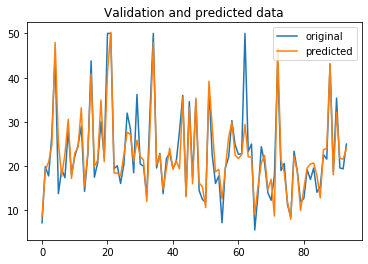

In [31]:
x_ax = range(len(y_val))
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, y_val_pred, label="predicted")
plt.title("Validation and predicted data")
plt.legend()
plt.show()

## 5. Best model and Hyperparameter Tuning <a class="anchor" id="Best_Model_and_Hyperparameter_tuning"></a>

Looking at the performance matrix we can see that out of the three models, Random forest Regressor seems to be having a better performance as compared to the other. Thus let us use this moder and tune it to optimize the model even further. This process is called **Hyperparameter tuning**.




In [33]:
columns = ['Random Forest Regressor','Linear Regression','XGBoost Regressor']
rows = ['RMSE Scores', 'R2 scores']
df = pd.DataFrame([[3.0636539510713177,5.318663551582231, 3.8135070848377497], [0.9040451327043832, 0.7108037690691893, 0.8513254247051454]], rows, columns)
df


,Random Forest Regressor,Linear Regression,XGBoost Regressor
RMSE Scores,3.063654,5.318664,3.813507
R2 scores,0.904045,0.710804,0.851325


Since we want our model to have the least RMSE and high R2. The closer to 1.0, the better it is at explaining the variability. So from the above table we can see that our random forest regressor does a better job than the other two, so let us take this model and further tune it using hyperparameter tuning (RandomSearchCV approach) to find the best fit parameters

#### Hyperparameter tuning

In [32]:
#Improving the randomforest model using gridsearchcv

n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 100)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(X_train, y_train)
m_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


{'n_estimators': 310,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'bootstrap': False}

Our RandomizedSearchCV helped in optimizing the prameter and finding the best ones. Now I will fit these parameters into my model to run and check how the performance changes.

## 6. Final Model <a class="anchor" id="Final_Model"></a>

In [34]:
randforest_model = RandomForestRegressor(n_estimators = 310, min_samples_leaf= 1, max_features= 'log2',bootstrap= False)
randforest_model.fit(X_train, y_train)
y_val_pred = randforest_model.predict(X_val)
rmse = (np.sqrt(mean_squared_error(y_val, y_val_pred)))
r2 = r2_score(y_val, y_val_pred)

print('RMSE score is: {} and R2 is {}'.format(rmse, r2))

RMSE score is: 3.264064779394815 and R2 is 0.8910806276664563


This looks great! I finally have my model and now let us bring in the test data

## 7. Test data <a class="anchor" id="Test_Data"></a>

### 7.1 Importing and handling missing values <a class="anchor" id="Importing_and_Handling_Missing_Values"></a>

In [35]:
#Importing the data and checking the top 10 rows of the training data frame
test_df = pd.read_csv('HousingData_test.csv')
test_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88
1,22.05110,0.0,18.10,0.0,0.740,5.818,92.4,1.8662,24,666,20.2,391.45,NaN
2,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24,666,20.2,385.96,NaN
3,5.66637,0.0,18.10,NaN,0.740,6.219,100.0,2.0048,24,666,20.2,395.69,16.59
4,23.64820,0.0,18.10,0.0,0.671,6.380,96.2,1.3861,24,666,20.2,396.90,23.69
5,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78
6,88.97620,0.0,18.10,0.0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21
7,15.87440,0.0,18.10,0.0,0.671,6.545,99.1,1.5192,24,666,20.2,396.90,21.08
8,0.13960,0.0,8.56,0.0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33
9,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5,384,20.9,394.05,16.47


#### Preprocessing the test data
Since we preprocessed out train and validation data before feeding into the model, the same applies to the test data. We need to check for NULL values and process and remove the unwanted columns

Let me start by dropping the unwanted columns and only treat the columns I need with filling the NAs

In [36]:
#These are the features we retain from the train dataset
features = X_train.columns
features

Index(['LSTAT', 'RM', 'CRIM', 'DIS', 'TAX', 'PTRATIO'], dtype='object')

In [37]:
test_df = test_df[features]
test_df.head()

,LSTAT,RM,CRIM,DIS,TAX,PTRATIO
0,22.88,5.627,9.39063,1.8172,666,20.2
1,NaN,5.818,22.05110,1.8662,666,20.2
2,NaN,6.406,9.72418,2.0651,666,20.2
3,16.59,6.219,5.66637,2.0048,666,20.2
4,23.69,6.380,23.64820,1.3861,666,20.2


In [38]:
#Cheking for nulls
test_df.isnull().sum()

LSTAT      2
RM         0
CRIM       0
DIS        0
TAX        0
PTRATIO    0
dtype: int64

In [39]:
test_df['LSTAT'].fillna(test_df['LSTAT'].mean(), inplace = True)

print(test_df.isnull().sum(axis=0))

LSTAT      0
RM         0
CRIM       0
DIS        0
TAX        0
PTRATIO    0
dtype: int64


### 7.2 Predicting the target variable <a class="anchor" id="Predicting_Target_Variable"></a>

In [41]:
#predicting the output
y_test_pred = randforest_model.predict(test_df)

## 8. Saving model weights to pickel file <a class="anchor" id="Saving_Model_Weights"></a>

In [45]:
import pickle
#Saving the model and testing by reloading it
pickle.dump(randforest_model, open('randomforest.pkl','wb'))
print("MODEL HAS BEEN SAVED SUCCESSFULLY")

# Loading model to compare the results
model = pickle.load(open('randomforest.pkl','rb'))
pred = randforest_model.predict(test_df)
print(pred)

MODEL HAS BEEN SAVED SUCCESSFULLY
[10.00709677 15.02096774 19.06548387 14.36709677 10.31967742 12.33774194
 16.24774194 14.21903226 21.3416129  17.90580645 17.85387097 20.11
 21.13032258 39.1183871  22.58806452 21.21064516 36.36483871 22.36935484
 29.99645161 19.23032258 21.7016129  14.51096774 21.01645161 20.57677419
 21.03741935 18.9683871  19.44903226 19.00387097 18.96612903 19.26903226
 19.46645161 20.87548387 14.73967742 18.81225806 15.0116129  14.42064516
 15.14387097 26.19580645 25.62225806]


## 9. Conclusion <a class="anchor" id="Conclusion"></a>

Taking a look back, 

1. There were a few missing valued that had to be handled before we could move ahead and dropping them was not an option because only one or two columns had missing values and dropping the entire row or column would mean we would be losing out on important information

2. Understanding the correlation of these features with the target variable and also amonsgt themselves, because firstly, some features might not be related or contributing to the target variable. Sercondly, retaining these features would cause multi-collinearity which is a very big problem because it would worsen the model performance by increasing the variance.

3. Splitting the mkodel into train and validation was very important in order to check the performance of my model before I tested it out on unseen real-data. 

4. A baseline model was built to use as a benchmark for improving the models on top of this baseline model. I then went ahead and built 3 diffrent models (because no can can assume one model works best, so I was trying 3 different approaches as a trial and error method to find the bet model).

4. Once I got the best model, I went ahead and performed hyperparameter tuning to optimize it further and find the best fitting parameters.

5. I went ahead and processed the test data to impute the nulls and removed the unnecessary columns to finally perform my prediction. 

6. Saved the model weights into a .pkl (pickle) file to be able to reuse it further.

7. Converted my jupyter notebook (Final preprocessing steps and model, not the eda, into a .py file for being able to deploy as an endpoint).

8. Used flask to deploy my moel and provided  GUI for inputs.

# 10. Steps and files for deploying model and setting up an end point <a class="anchor" id="Model_Deployement"></a>

For deploying the model, please replicate the same document structure on your machine.
There are various files:
1. model.py
This is the finalized file for running the model succesfully. It has all the preprocessing steps and the model is loaded using the pickle file which has the trained weights saved.

2. app.py
Run this file to be able to start a flask app. 

3. request.py 
This file is used to get for getting direct api calls through request. 

There is also a css file and an index.html file for styling the webpage

## How to run these files? 
Make sure the entire folder structure is correctly copied to your local system.

### Step 1. 
Run model.py**
### Step 2: 
    a. Run app.py in a seperate terminal
    b. Copy the url and open in a browser
    c. enter the values of the columns requested
    d. click the predict button to predict the housing prices**
  
### Step 3: 
Run the request file (optional)**


# 11. References <a class="anchor" id="References"></a>

1. https://www.kaggle.com/shreayan98c/boston-house-price-prediction
2. https://github.com/krishnaik06
3. https://towardsdatascience.com/predicting-housing-prices-using-a-scikit-learns-random-forest-model-e736b59d56c5
4. https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e